In [31]:
import pandas as pd
import numpy as np
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from catboost import CatBoost, CatBoostClassifier, Pool, metrics, cv
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [32]:
data = pd.read_csv('GakiDATA.csv')

In [33]:
data

,area1,area,per1,per,cont,apr,target
0,56.0,467.5,28.970562,82.183765,2,6,0
1,58.0,500.0,28.970562,85.597979,2,7,0
2,0.0,454.0,0.000000,80.769552,1,7,1
3,63.5,467.5,30.384776,82.183765,2,8,0
4,91.0,581.0,34.970562,92.426406,2,6,1
5,60.5,541.0,28.727922,88.769552,3,6,1
6,470.0,1.5,82.769552,5.414214,3,4,0
7,47.0,818.0,26.142135,111.396968,2,7,1
8,0.0,483.5,0.000000,84.183765,1,6,1
9,56.5,495.5,27.556349,85.012192,2,7,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area1   18 non-null     float64
 1   area    18 non-null     float64
 2   per1    18 non-null     int64  
 3   per     18 non-null     float64
 4   cont    18 non-null     int64  
 5   apr     18 non-null     int64  
 6   target  18 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 1.1 KB


<Axes: >

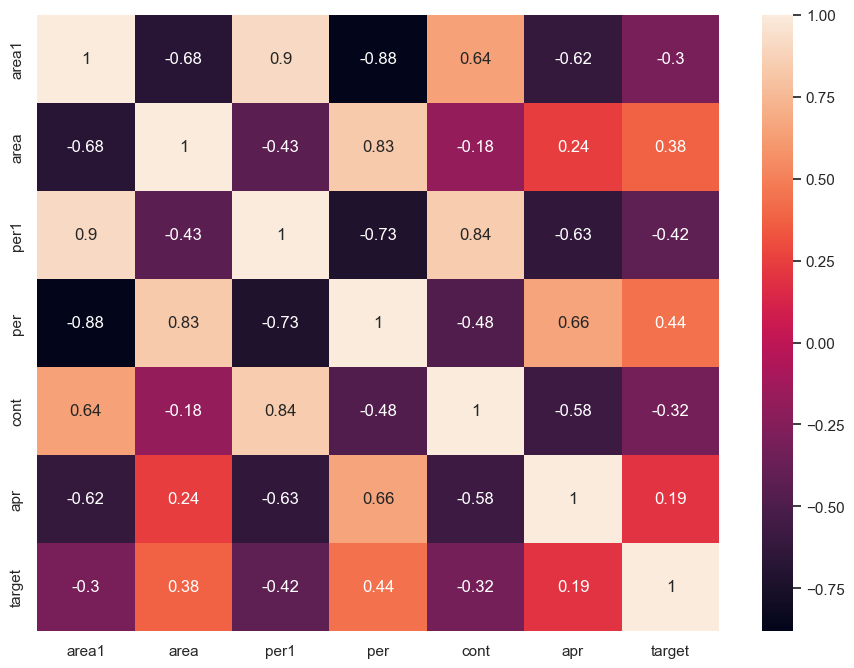

In [36]:
corr_matrix = data.corr()

sns.set(rc={'figure.figsize': (11, 8)})

sns.heatmap(corr_matrix, annot=True)

In [6]:
# data = data.drop(columns=['area/per', 'approx1'])

<Axes: xlabel='target', ylabel='Count'>

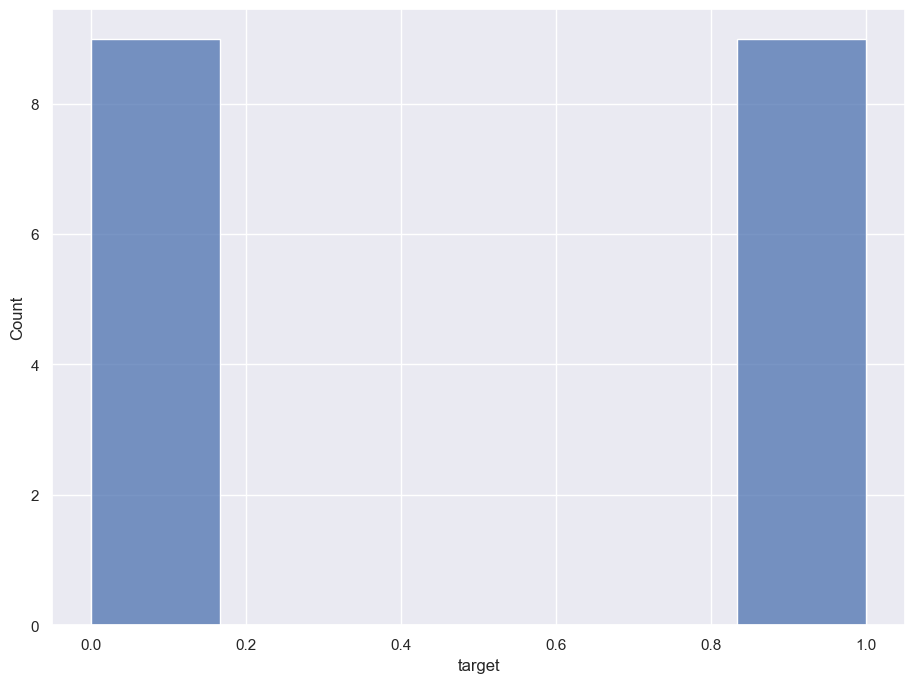

In [7]:
sns.histplot(x=data['target'])

In [8]:
X = data.drop(columns=['target'])
Y = data['target']

In [16]:
clf = LogisticRegression()


param_grid = {
    'C': [100, 10, 9, 8, 7, 6,  1, 0.1, 0.01, 0.001, 200, 110, 150, 350, 400],
    'penalty': ['l1', 'l2'],
    'tol': [0.0001, 0.00001, 0.000001, 0.001, 0.01, 0.1, 0.005, 0.05, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100, 250, 400, 550, 300, 1000],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, refit=True, scoring='roc_auc')

search.fit(X, Y)

print(search.best_params_)

clfBest = search.best_estimator_

pred = clfBest.predict(X)

c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
94500 fits failed out of a total of 226800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18900 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Egor\AppData\Local\Program

{'C': 100, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.7}


c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [ nan  nan  nan ... 0.85 0.8  0.8 ]
  warnings.warn(


In [17]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [18]:
print(accuracy_score(Y, pred))
print(roc_auc_score(Y, pred))

0.6666666666666666
0.6666666666666666


In [19]:
with open('bestModelLR.bf', '+wb') as bestModel:
    pickle.dump(clfBest, bestModel)

In [13]:
model_catBOOST_search = CatBoostClassifier(iterations=150,
                                           learning_rate=0.01,
                                           depth=10,
                                           l2_leaf_reg=2.5,
                                        #    model_size_reg=50,
                                        #    one_hot_max_size=50,
                                           eval_metric='AUC',
                                        #    rsm = 1,
                                           loss_function='Logloss',
                                           border_count=50,
                                           verbose=False)
model_catBOOST_search.fit(X, Y)
predCBF = model_catBOOST_search.predict(X)

In [14]:
print(accuracy_score(predCBF, Y))
print(roc_auc_score(predCBF, Y))

1.0
1.0


In [15]:
with open('bestModelCBC.bf', '+wb') as bestModel:
    pickle.dump(model_catBOOST_search, bestModel)

In [11]:
from sklearn import tree

In [41]:
treeClasif = tree.DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [6, 7, 8, 9, 10, 14, 16, 28],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [2, 3, 4, 5, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [None, 10, 25, 35, 42],
    'max_leaf_nodes': [None, 2, 3, 4, 5, 6, 10]
}

search = GridSearchCV(treeClasif, param_grid, n_jobs=-1, refit=True, scoring='roc_auc')

search.fit(X, Y)

print(search.best_params_)

treeClasifBest = search.best_estimator_

predTreeClasif = treeClasifBest.predict(X)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'random_state': None, 'splitter': 'random'}


c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [42]:
print(accuracy_score(predTreeClasif, Y))
print(roc_auc_score(predTreeClasif, Y))

0.7222222222222222
0.8214285714285714


In [43]:
with open('treeClasifBest.bf', '+wb') as bestModel:
    pickle.dump(treeClasifBest, bestModel)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=14,
    class_weight='balanced'
)

param_grid = {
    'n_estimators': [50, 80, 100, 250],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [6, 8, 10, 14, 16, 28],
    'min_samples_split': [2, 3, 4, 6],
    'min_samples_leaf': [2, 3, 4, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample'],
    'random_state': [None, 25, 42],
}

# search = GridSearchCV(rfc, param_grid, n_jobs=-1, refit=True, scoring='roc_auc')

rfc.fit(X, Y)

# print(search.best_params_)

# rfcBest = search.best_estimator_

predRfc = rfc.predict(X)

In [22]:
print(accuracy_score(predRfc, Y))
print(roc_auc_score(predRfc, Y))

1.0
1.0


In [24]:
with open('rfc.bf', '+wb') as bestModel:
    pickle.dump(rfc, bestModel)

In [23]:
model_catBOOST_search = CatBoostClassifier(iterations=4,
                                           learning_rate=0.01,
                                           depth=6,
                                           l2_leaf_reg=2.5,
                                        #    model_size_reg=50,
                                        #    one_hot_max_size=50,
                                           eval_metric='AUC',
                                        #    rsm = 1,
                                           loss_function='Logloss',
                                           border_count=49,
                                           verbose=False)

model_catBOOST_search.fit(X, Y)

predCBF = model_catBOOST_search.predict(X)

print(accuracy_score(predCBF, Y))
print(roc_auc_score(predCBF, Y))

with open('bestModelCBC.bf', '+wb') as bestModel:
    pickle.dump(model_catBOOST_search, bestModel)

1.0
1.0
